# Decision Tree and Confusion Matrix ML technique for Smoking Data 

In [1]:
import pandas as pd
df = pd.read_csv('Smoking Data.csv')

In [2]:
df.head()

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    1338 non-null   object 
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


In [4]:
df.shape

(1338, 6)

In [5]:
df.isnull().sum()

region      0
age         0
sex         0
bmi         0
children    0
smoker      0
dtype: int64

# Label Encoding for the data

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [7]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [9]:
df.region=le.fit_transform(df['region'])
df.sex=le.fit_transform(df['sex'])
df.smoker=le.fit_transform(df['smoker'])

df.head()

,region,age,sex,bmi,children,smoker
0,3,19,0,27.900,0,1
1,2,18,1,33.770,1,0
2,2,28,1,33.000,3,0
3,1,33,1,22.705,0,0
4,1,32,1,28.880,0,0


In [10]:
df.region.unique()

array([3, 2, 1, 0])

In [11]:
df.sex.unique()

array([0, 1])

In [12]:
import seaborn as sns

In [13]:
df.smoker.value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [53]:
274/(1064+274) # 20% people smoker

0.20478325859491778

<AxesSubplot:xlabel='smoker', ylabel='count'>

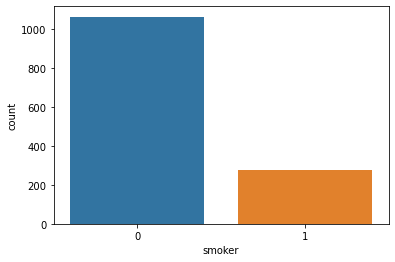

In [54]:
sns.countplot(x='smoker',data=df)

<AxesSubplot:xlabel='sex', ylabel='count'>

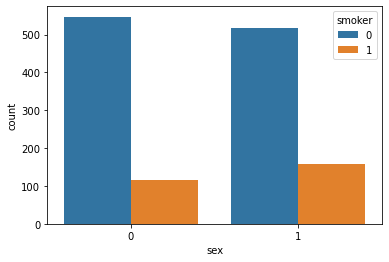

In [56]:
sns.countplot(x='sex',data=df, hue='smoker')

In [57]:
df.sex.value_counts()

1    676
0    662
Name: sex, dtype: int64

In [58]:
115/(547+115) #17% female are smoker

0.17371601208459214

In [59]:
150/(526+150) #22% male are smoker

0.22189349112426035

In [14]:
#southwest = 3', 'southeast =2', 'northwest=1', 'northeast=0
# female = 0, male=1


x = df.drop('smoker',axis=1)
y = df.smoker

In [15]:
x.head()

,region,age,sex,bmi,children
0,3,19,0,27.900,0
1,2,18,1,33.770,1
2,2,28,1,33.000,3
3,1,33,1,22.705,0
4,1,32,1,28.880,0


# Spliting the dataset for train and test

In [16]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(x,y,train_size=.70, random_state=280)

In [17]:
xtrain.shape

(936, 5)

In [18]:
xtest.shape

(402, 5)

# Training ML Decision Tree Model

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

# Plot a decision tree diagram

In [20]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(274.89631911057694, 640.24, 'sex <= 0.5\ngini = 0.336\nsamples = 936\nvalue = [736, 200]'),
 Text(115.57653245192309, 616.08, 'bmi <= 22.995\ngini = 0.304\nsamples = 455\nvalue = [370, 85]'),
 Text(37.2, 591.9200000000001, 'children <= 1.5\ngini = 0.473\nsamples = 47\nvalue = [29, 18]'),
 Text(20.03076923076923, 567.76, 'bmi <= 20.045\ngini = 0.415\nsamples = 34\nvalue = [24, 10]'),
 Text(17.16923076923077, 543.6, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(22.892307692307693, 543.6, 'bmi <= 21.898\ngini = 0.473\nsamples = 26\nvalue = [16, 10]'),
 Text(11.446153846153846, 519.44, 'region <= 0.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(5.723076923076923, 495.2800000000001, 'age <= 35.0\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(2.8615384615384616, 471.12000000000006, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(8.584615384615384, 471.12000000000006, 'age <= 42.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(5.723076923076923, 446.96000000000004,

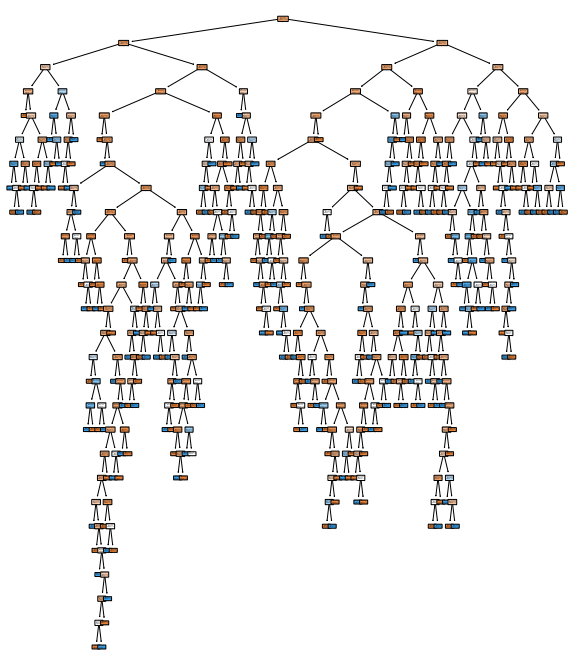

In [21]:
plt.figure(figsize=(10,12))
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x.columns)

# Prediction for testing dataset

In [22]:
pred= clf.predict(xtest)

In [23]:
pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [24]:
clf.predict([[3,19,0,27.900,0]]) # yes=1

array([1])

In [25]:
clf.predict([[1,32,1,28.880,0]])# no = 0

array([0])

# Finding accuracy

In [26]:
clf.score(xtrain, ytrain)

0.9989316239316239

In [27]:
clf.score(xtest, ytest)

0.6467661691542289

In [28]:
from sklearn.metrics import classification_report, confusion_matrix,roc_curve, plot_roc_curve

In [29]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       328
           1       0.18      0.26      0.21        74

    accuracy                           0.65       402
   macro avg       0.50      0.50      0.49       402
weighted avg       0.70      0.65      0.67       402



In [30]:
xtest.shape

(402, 5)

In [31]:
con_mat = confusion_matrix(ytest, pred)

In [32]:
con_mat 

array([[241,  87],
       [ 55,  19]])

<AxesSubplot:>

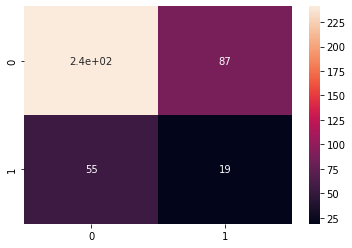

In [33]:
sns.heatmap(con_mat,annot=True)

In [34]:
tp,fn,fp,tn=confusion_matrix(ytest,pred).reshape(-1)

In [35]:
tp

241

In [36]:
fn

87

In [37]:
fp

55

In [38]:
tn

19

In [39]:
Accuracy = (tp+tn)/(tp+fp+tn+fn)

In [40]:
Accuracy

0.6467661691542289

In [41]:
# Precision or Positive Predictive Value(PPV)= tp/(tp+fp)

Precision = tp/(tp+fp)

In [42]:
Precision

0.8141891891891891

In [43]:
# Sensitivity, Recall, Hit rate, or True Positive Rate(TPR)
TPR = tp/(tp+fn)

In [44]:
TPR

0.7347560975609756

In [45]:
# False Positive Rate(FPR) or 1-Specificity

FPR = fp/(fp+tn)
FPR

0.7432432432432432

In [46]:
# F1 Measure = (precision+Recall)/2

F1_Measure = (Precision+TPR)/2
F1_Measure 

0.7744726433750824

In [47]:
# Harmonic Mean, F1 Score

# F1 = (2*Precision*Recall)/(Precision*Recall)
F1 = (2*Precision*TPR)/(Precision*TPR)
F1

2.0

In [48]:
# Specificity, Selectivity or True Negative Rate(TNR)

Specificity = tn/(tn+fp)
Specificity

0.25675675675675674

In [49]:
# Threat Score(TS) or Critical Sccess Index(CSI)
CSI = tp/(tp+fn+fp)
CSI

0.6292428198433421

In [50]:
# False Discovery Rate(FDR)

FDR = fp/(tp+fp)
FDR 

0.1858108108108108

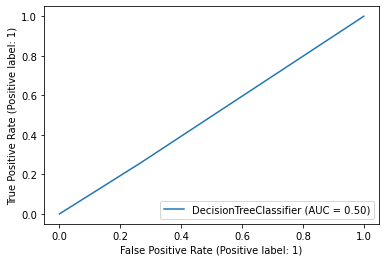

In [51]:
plot_roc_curve(clf,xtest,ytest)

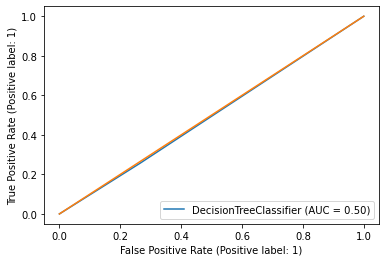

In [52]:
import matplotlib.pyplot as plt

plot_roc_curve(clf,xtest,ytest)
plt.plot([0,1],[0,1])